## Two Coin Bias Difference and Resampling

In [1]:
from __future__ import division
import scipy.stats as sp
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('white')

### Generate Original Sample from the Unknown Population

In [66]:
sample_size_one = 100
sample_size_two = 100
coin_one = sp.bernoulli(.5)
coin_two = sp.bernoulli(.7)

In [67]:
sample_one = coin_one.rvs(size=sample_size_one)
sample_two = coin_two.rvs(size=sample_size_two)
all_data = np.concatenate([sample_one, sample_two])

In [68]:
two_coin_sample_stat = np.mean(sample_one) - np.mean(sample_two)

### Generate Sampling Distribution and Conduct T-test

In [69]:
two_coin_num_simulations = 10000

In [70]:
two_coin_diff_dist = []
for _ in range(two_coin_num_simulations):
    resample = np.random.choice(all_data, size=len(all_data), replace=False)
    resample_one, resample_two = np.split(resample, [len(sample_one)])
    two_coin_diff_dist.append(np.mean(resample_one) - np.mean(resample_two))

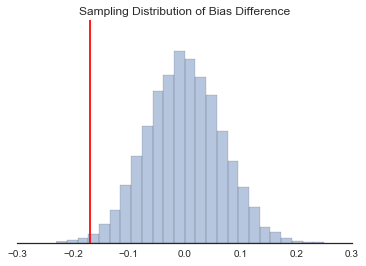

In [72]:
ax = sns.distplot(two_coin_diff_dist, bins=25, kde=False, norm_hist=True)
ax.axvline(two_coin_sample_stat, color='red')

ax.set(yticklabels=[], xlim=[-0.3, 0.3], title='Sampling Distribution of Bias Difference')
sns.despine(top=True, left=True, right=True)

In [73]:
two_coin_p_value = sum(two_coin_diff_dist < two_coin_sample_stat)/len(two_coin_diff_dist)

In [74]:
two_coin_p_value

0.0053